<a href="https://colab.research.google.com/github/rafimagdon-wq/srilankadengueanalysis/blob/main/denguedataanalyticssrilanka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')  # Mount Google Drive

# Use your file path inside Drive
df = pd.read_csv("/content/SriLanka_dengidata_2013_2022.csv", index_col=False)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,index,time,region,meanTair_F_Inst,minTair_F_Inst,maxTair_F_Inst,meanQair_F_Inst,meanSoilmoi0_10Cm_Inst,meanCanopint_Inst,meanPsurf_F_Inst,meanNdvi,minNdvi,maxNdvi,meanPrecipitationcal,minPrecipitationcal,maxPrecipitationcal,cases
0,0,7875.0,315.0,Ampara,302.333191,301.926086,302.702484,0.017031,25.367788,0.070869,99238.156250,0.336044,0.181286,0.500243,1.081435,0.002426,5.917336,3.0
1,1,7876.0,315.0,Anuradhapura,302.066742,301.648224,302.776428,0.017640,20.588243,0.000887,99664.914062,0.329114,0.174629,0.424814,0.031669,0.000000,0.451204,9.0
2,2,7877.0,315.0,Badulla,296.759888,290.434296,302.063751,0.015888,28.335207,0.108685,91665.226562,0.265771,0.162514,0.409743,1.006210,0.018600,2.355008,29.0
3,3,7878.0,315.0,Batticaloa,303.107391,302.881073,303.405914,0.017433,20.746124,0.040024,100180.687500,0.417131,0.307329,0.501071,0.042987,0.000000,0.689772,23.0
4,4,7879.0,315.0,Colombo,300.694458,300.045013,301.343933,0.017812,28.184500,0.110018,99863.453125,0.333495,0.221043,0.436129,8.888183,5.248857,14.715760,25.0


In [7]:
df = df.loc[:, ~df.columns.astype(str).str.contains('^Unnamed', case=False)]
df.head()

,index,time,region,meanTair_F_Inst,minTair_F_Inst,maxTair_F_Inst,meanQair_F_Inst,meanSoilmoi0_10Cm_Inst,meanCanopint_Inst,meanPsurf_F_Inst,meanNdvi,minNdvi,maxNdvi,meanPrecipitationcal,minPrecipitationcal,maxPrecipitationcal,cases
0,7875.0,315.0,Ampara,302.333191,301.926086,302.702484,0.017031,25.367788,0.070869,99238.156250,0.336044,0.181286,0.500243,1.081435,0.002426,5.917336,3.0
1,7876.0,315.0,Anuradhapura,302.066742,301.648224,302.776428,0.017640,20.588243,0.000887,99664.914062,0.329114,0.174629,0.424814,0.031669,0.000000,0.451204,9.0
2,7877.0,315.0,Badulla,296.759888,290.434296,302.063751,0.015888,28.335207,0.108685,91665.226562,0.265771,0.162514,0.409743,1.006210,0.018600,2.355008,29.0
3,7878.0,315.0,Batticaloa,303.107391,302.881073,303.405914,0.017433,20.746124,0.040024,100180.687500,0.417131,0.307329,0.501071,0.042987,0.000000,0.689772,23.0
4,7879.0,315.0,Colombo,300.694458,300.045013,301.343933,0.017812,28.184500,0.110018,99863.453125,0.333495,0.221043,0.436129,8.888183,5.248857,14.715760,25.0


In [8]:
# 2b) Strip whitespace from column names (avoids bugs)
df.columns = [c.strip() for c in df.columns]

In [9]:
# 2c) Identify the dengue cases column (case-insensitive)
case_candidates = [c for c in df.columns if c.lower() == 'cases']
if not case_candidates:
    # fallback if your sheet used a different name
    case_candidates = [c for c in df.columns if c.lower() in
                       ['dengue_cases', 'no_of_cases', 'num_cases', 'number_of_cases']]
if not case_candidates:
    raise ValueError("Couldn't find a 'cases' column. Check the exact name in your file.")
case_col = case_candidates[0]

In [10]:
# 2d) Identify the district column
district_candidates = [c for c in df.columns if 'district' in c.lower()]
if district_candidates:
    district_col = district_candidates[0]
else:
    # If no obvious district column, pick the first non-numeric text column
    non_num = df.select_dtypes(exclude=['number', 'bool', 'datetime']).columns.tolist()
    district_col = non_num[0] if non_num else case_col  # last resort

In [11]:
# 3) First look at the data
# ===============================
print("First 10 rows:")
display(df.head(10))

print("\nDataset shape (rows, columns):", df.shape)


First 10 rows:


,index,time,region,meanTair_F_Inst,minTair_F_Inst,maxTair_F_Inst,meanQair_F_Inst,meanSoilmoi0_10Cm_Inst,meanCanopint_Inst,meanPsurf_F_Inst,meanNdvi,minNdvi,maxNdvi,meanPrecipitationcal,minPrecipitationcal,maxPrecipitationcal,cases
0,7875.0,315.0,Ampara,302.333191,301.926086,302.702484,0.017031,25.367788,0.070869,99238.156250,0.336044,0.181286,0.500243,1.081435,0.002426,5.917336,3.0
1,7876.0,315.0,Anuradhapura,302.066742,301.648224,302.776428,0.017640,20.588243,0.000887,99664.914062,0.329114,0.174629,0.424814,0.031669,0.000000,0.451204,9.0
2,7877.0,315.0,Badulla,296.759888,290.434296,302.063751,0.015888,28.335207,0.108685,91665.226562,0.265771,0.162514,0.409743,1.006210,0.018600,2.355008,29.0
3,7878.0,315.0,Batticaloa,303.107391,302.881073,303.405914,0.017433,20.746124,0.040024,100180.687500,0.417131,0.307329,0.501071,0.042987,0.000000,0.689772,23.0
4,7879.0,315.0,Colombo,300.694458,300.045013,301.343933,0.017812,28.184500,0.110018,99863.453125,0.333495,0.221043,0.436129,8.888183,5.248857,14.715760,25.0
5,7880.0,315.0,Galle,298.367584,297.697845,299.037323,0.018117,30.399677,0.134482,98299.054688,0.290400,0.163814,0.410971,5.730884,2.943855,11.839195,28.0
6,7881.0,315.0,Gampaha,301.273315,300.819489,301.727142,0.017777,25.189928,0.076402,100048.640625,0.395846,0.298357,0.481214,3.208881,0.308541,6.516973,23.0
7,7882.0,315.0,Hambantota,301.192627,300.320892,301.978943,0.017120,27.548025,0.118012,100043.632812,0.270783,0.164400,0.415100,4.211367,2.219258,8.704349,13.0
8,7883.0,315.0,Jaffna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.208959,0.052929,0.284414,0.026937,0.001833,0.076131,12.0
9,7884.0,315.0,Kalutara,299.445129,299.346100,299.544128,0.017860,30.359669,0.125054,99474.757812,0.343058,0.260614,0.416571,10.589280,4.749471,16.920530,74.0



Dataset shape (rows, columns): (11900, 17)


In [12]:
print("\nMissing values per column:")
missing = df.isna().sum().to_frame('missing_values')
missing['missing_rate_%'] = (missing['missing_values'] / len(df) * 100).round(2)
display(missing)


Missing values per column:


,missing_values,missing_rate_%
index,0,0.00
time,0,0.00
region,0,0.00
meanTair_F_Inst,476,4.00
minTair_F_Inst,476,4.00
maxTair_F_Inst,476,4.00
meanQair_F_Inst,476,4.00
meanSoilmoi0_10Cm_Inst,476,4.00
meanCanopint_Inst,476,4.00
meanPsurf_F_Inst,476,4.00


In [13]:
print("\nDescriptive stats for 'cases':")
display(df[case_col].describe())


Descriptive stats for 'cases':


,cases
count,11900.000000
mean,43.325210
std,106.171273
min,0.000000
25%,3.000000
50%,13.000000
75%,40.000000
max,2631.000000


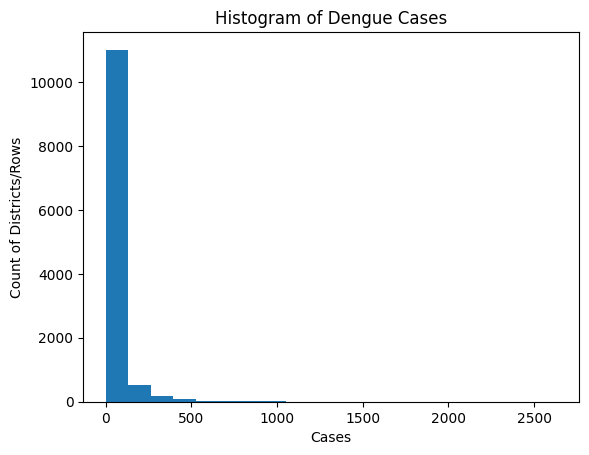

In [15]:
# ===============================
# 4) Visualize the distribution of cases
# ===============================

# 4a) Histogram: shows how cases are distributed (e.g., many low values? a few high?)
import matplotlib.pyplot as plt # Import the necessary library

plt.figure()
plt.hist(df[case_col].dropna(), bins=20)
plt.title('Histogram of Dengue Cases')
plt.xlabel('Cases')
plt.ylabel('Count of Districts/Rows')
plt.show()

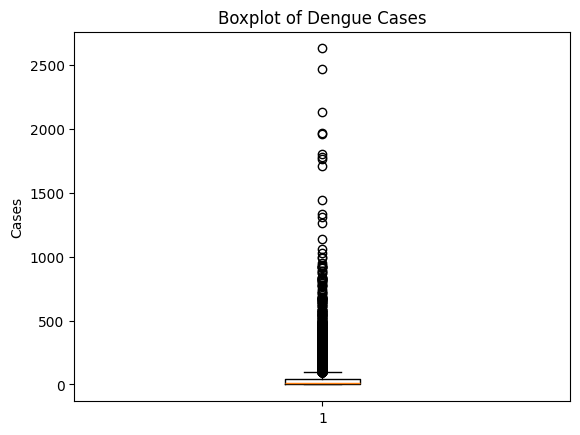

In [16]:
# 4b) Boxplot: shows median, spread, and outliers quickly
plt.figure()
plt.boxplot(df[case_col].dropna(), vert=True)
plt.title('Boxplot of Dengue Cases')
plt.ylabel('Cases')
plt.show()

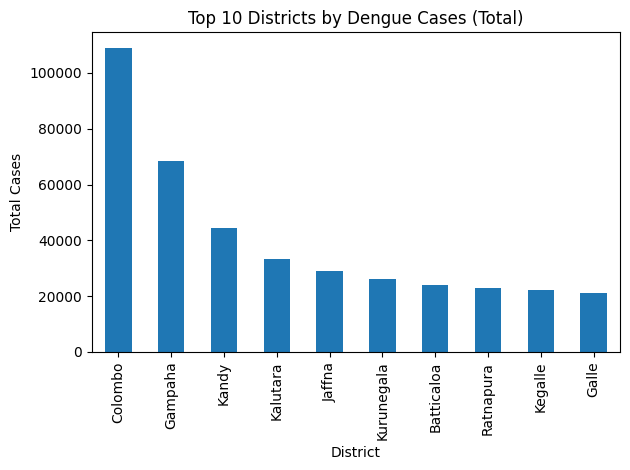

In [17]:
# 5) Top 10 districts by total cases
# ===============================
# NOTE: If you have one row per district, this still works. If you have multiple rows per district
# (e.g., different times), this sums them up.
top10 = (
    df.groupby(district_col, dropna=False)[case_col]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)
plt.figure()
top10.plot(kind='bar')
plt.title('Top 10 Districts by Dengue Cases (Total)')
plt.xlabel('District')
plt.ylabel('Total Cases')
plt.tight_layout()
plt.show()


Correlation strength with 'cases' (absolute Pearson r):


,abs_r
meanQair_F_Inst,0.127260
meanSoilmoi0_10Cm_Inst,0.114978
maxNdvi,0.106995
meanNdvi,0.076712
minPrecipitationcal,0.055760
meanCanopint_Inst,0.052206
meanPsurf_F_Inst,0.038118
maxTair_F_Inst,0.037975
meanTair_F_Inst,0.036268
minNdvi,0.030822


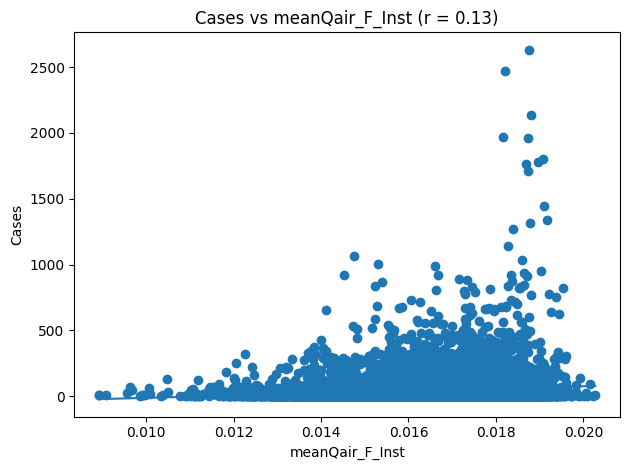

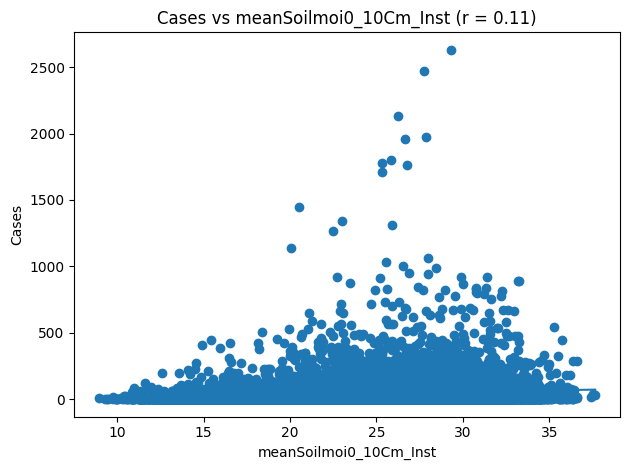

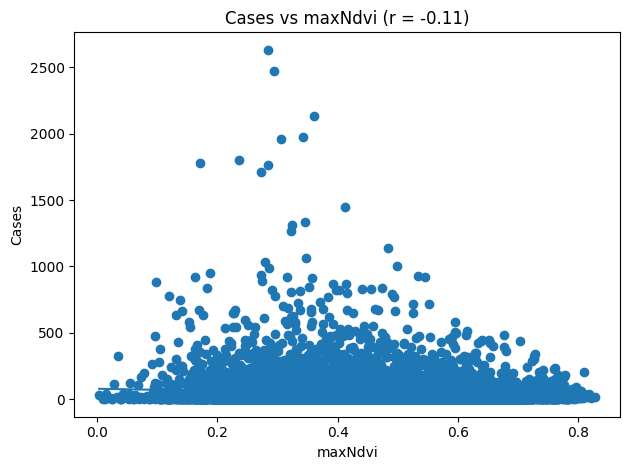

In [19]:
# 6) Relationships: cases vs satellite features
# ===============================
# We'll find numeric columns other than 'cases', rank them by correlation with cases,
# and plot scatterplots for the top 3. This helps you see which variables are most
# linearly related to cases.
import numpy as np # Import the necessary library
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
feature_cols = [c for c in numeric_cols if c != case_col]

# absolute correlation (so we catch both positive and negative)
corr_with_cases = df[feature_cols].corrwith(df[case_col]).abs().sort_values(ascending=False)

print("\nCorrelation strength with 'cases' (absolute Pearson r):")
display(corr_with_cases.to_frame('abs_r'))

# Take top 3 to keep it readable
top_features = corr_with_cases.index.tolist()[:3]

for feat in top_features:
    tmp = df[[feat, case_col]].dropna()
    if len(tmp) == 0:
        continue
    r = tmp[feat].corr(tmp[case_col])   # Pearson correlation

    plt.figure()
    plt.scatter(tmp[feat], tmp[case_col])
    # Simple trend line using numpy.polyfit (if possible)
    try:
        m, b = np.polyfit(tmp[feat], tmp[case_col], 1)
        x = np.linspace(tmp[feat].min(), tmp[feat].max(), 100)
        plt.plot(x, m*x + b)  # default color
    except Exception:
        pass
    plt.title(f"Cases vs {feat} (r = {r:.2f})")
    plt.xlabel(feat)
    plt.ylabel('Cases')
    plt.tight_layout()
    plt.show()


Correlation matrix:


,cases,meanQair_F_Inst,meanSoilmoi0_10Cm_Inst,maxNdvi
cases,1.000000,0.127412,0.114886,-0.109553
meanQair_F_Inst,0.127412,1.000000,0.125050,-0.301400
meanSoilmoi0_10Cm_Inst,0.114886,0.125050,1.000000,-0.333081
maxNdvi,-0.109553,-0.301400,-0.333081,1.000000


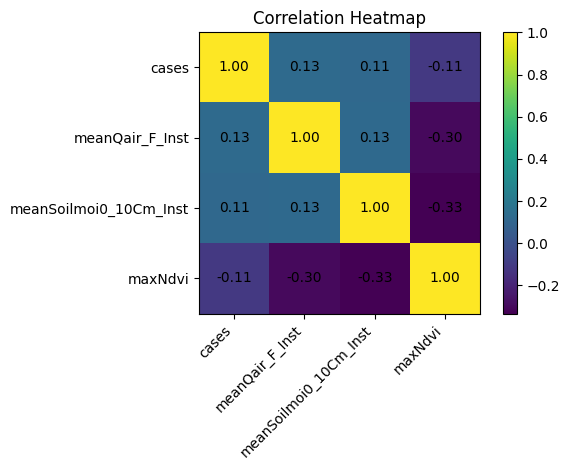

In [20]:
# 7) Correlation heatmap (small set)
# ===============================
# Include 'cases' + up to 5 top features for a readable heatmap.
heat_features = [case_col] + top_features[:5]
heat_df = df[heat_features].dropna()

if heat_df.shape[1] >= 2 and len(heat_df) > 0:
    corr_matrix = heat_df.corr()
    print("\nCorrelation matrix:")
    display(corr_matrix)

    plt.figure()
    plt.imshow(corr_matrix, interpolation='nearest')  # default colormap (no custom colors)
    plt.title('Correlation Heatmap')
    plt.xticks(ticks=np.arange(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=45, ha='right')
    plt.yticks(ticks=np.arange(len(corr_matrix.index)), labels=corr_matrix.index)
    plt.colorbar()
    # Put the correlation value on each cell (rounded to 2 decimals)
    for i in range(corr_matrix.shape[0]):
        for j in range(corr_matrix.shape[1]):
            plt.text(j, i, f"{corr_matrix.iat[i, j]:.2f}", ha='center', va='center')
    plt.tight_layout()
    plt.show()

In [21]:
# 8) (Optional) Save a cleaned copy
# ===============================
# This simply saves the cleaned dataset (without Unnamed columns).
df.to_excel('dengue_cleaned.xlsx', index=False)
print("Saved cleaned file as dengue_cleaned.xlsx")

Saved cleaned file as dengue_cleaned.xlsx


Drop accidental index-like columns (named "Unnamed: ...")


1) Pearson correlation (strength + direction of linear relationship)
Formula (you’ll see it right on each plot):
r

=

cov
⁡
(
X
,
Y
)
σ
X

σ
Y
r=
σ
X
​
 σ
Y
​

cov(X,Y)
​

cov
⁡
(
X
,
Y
)
cov(X,Y) is covariance (“do X and Y rise/fall together?”).
σ
X
σ
X
​
  and
σ
Y
σ
Y
​
  are standard deviations (spread).
r
∈
[
−
1
,
1
]
r∈[−1,1]:
r
≈
+
1
r≈+1: strong positive linear trend
r
≈
−
1
r≈−1: strong negative linear trend
r
≈
0
r≈0: no strong linear trend
In the code, we compute
r
r with np.corrcoef.
2) Best-fit line (simple linear regression)
We fit a straight line that best predicts cases from precipitation:
y
^

=

m

x
+
b
y
^
​
 =mx+b
m
m is the slope: “how many extra cases for each unit increase in precipitation?”
b
b is the intercept: predicted cases when precipitation is 0 (just a baseline).
We find
m
m and
b
b using least squares (minimizes average squared vertical error). In code, that’s np.polyfit(x, y, 1).
3) Coefficient of determination
R
2
R
2

For simple one-feature regression (one x), a neat identity holds:
R
2
=
r
2
R
2
 =r
2

R
2
∈
[
0
,
1
]
R
2
 ∈[0,1].
Example:
R
2
=
0.25
R
2
 =0.25 means about 25% of the variation in cases is explained by a straight-line relationship with that precipitation variable (the rest is due to other factors or non-linear/complex patterns).
